In [1]:
# this is awraper function for mrs that collects the disparate mrs data, calculates group stats, and output to google spreadsheet.
# first set global root data directory
%matplotlib inline
import seaborn as sb
import pylabs
pylabs.datadir.target = 'scotty'
from pathlib import *
import datetime
import numpy as np
import pandas as pd
import json
import scipy.stats as ss
from pylabs.utils import ProvenanceWrapper, getnetworkdataroot, appendposix, replacesuffix, WorkingContext, run_subprocess, pylabs_dir
from pylabs.projects.nbwr.file_names import project
prov = ProvenanceWrapper()

fs = Path(getnetworkdataroot())
stats_dir = fs / project / 'stats' / 'mrs'
corr_metab = pd.read_hdf(str(stats_dir / 'all_nbwr_mrs_results_csfcorr_fits_forkam.h5'))
asd_grp = corr_metab.index.str.replace('sub-nbwr','').astype('int') < 400
asd_metab = corr_metab[asd_grp]
cntrl_metab = corr_metab[~asd_grp]
ttest_results = pd.Series(ss.ttest_ind(asd_metab, cntrl_metab, axis=0, equal_var=False), index=['t-stat', 'p-value'])
ttest_results_df = pd.DataFrame.from_dict({'t-stat': ttest_results['t-stat'], 'p-value': ttest_results['p-value']})
col_map = {}
for n, c in zip(range(0, len(corr_metab.columns)), corr_metab.columns):
    col_map[n] = c
ttest_results_df.rename(index=col_map,inplace=True)
ttest_results_df.sort_values(by='p-value', ascending=True)

setting root data directory to scotty.
setting root data directory to scotty.
/Users/mrjeffs/Documents/Research/data
170927-13:14:53,192 Cloud DEBUG:
	 Log file (/Users/mrjeffs/.picloud/cloud.log) opened
170927-13:14:53,194 Cloud DEBUG:
	 Deleting 10900.lock (12.2438216934 days old)
170927-13:14:53,195 Cloud DEBUG:
	 Deleting 10900.log (12.2438216934 days old)
170927-13:14:53,196 Cloud DEBUG:
	 Deleting 11039.lock (12.2430578045 days old)
170927-13:14:53,197 Cloud DEBUG:
	 Deleting 11039.log (12.2430578045 days old)
170927-13:14:53,198 Cloud DEBUG:
	 Deleting 11336.lock (12.2069235452 days old)
170927-13:14:53,199 Cloud DEBUG:
	 Deleting 11336.log (12.2069235452 days old)
170927-13:14:53,200 Cloud DEBUG:
	 Deleting 17327.lock (9.24965502669 days old)
170927-13:14:53,201 Cloud DEBUG:
	 Deleting 17327.log (9.24965502669 days old)
170927-13:14:53,202 Cloud DEBUG:
	 Deleting 17586.lock (9.0169698415 days old)
170927-13:14:53,204 Cloud DEBUG:
	 Deleting 17586.log (9.0169698415 days old)
170

,p-value,t-stat
right-Glu-80ms,0.029264,2.442246
right-GluOverGABA,0.040157,2.268953
right-CrplusPCr,0.103959,-1.831806
right-GABA,0.293411,-1.089208
left-NAAplusNAAG,0.366227,-0.941277
right-NAAplusNAAG,0.472529,-0.743902
left-GABA,0.482783,-0.720562
right-mIns,0.528185,-0.660134
right-GPCplusPCh,0.585388,-0.566243
left-mIns,0.593810,-0.552512


In [72]:
corr_metab.loc[corr_metab.index[asd_grp], 'group'] = 'asd'
corr_metab.loc[corr_metab.index[~asd_grp], 'group'] = 'typical'

lt_corr_metab = corr_metab.loc[:, [x for x in corr_metab.columns if 'left' in x] + ['group']]
rt_corr_metab = corr_metab.loc[:, [x for x in corr_metab.columns if 'right' in x] + ['group']]

lt_corr_metab.loc[lt_corr_metab.index[asd_grp], [x for x in corr_metab.columns if 'left' in x]]#.sort_values(axis=0)

,left-GABA,left-NAAplusNAAG,left-GPCplusPCh,left-CrplusPCr,left-mIns,left-Glu-80ms,left-GluOverGABA
subject,,,,,,,
sub-nbwr007,1.213333,8.920000,1.722222,5.996667,3.077778,8.183333,6.744505
sub-nbwr038,0.866667,7.868889,1.428889,6.235556,3.708889,8.220000,9.484615
sub-nbwr088,1.260000,7.438889,1.592222,6.077778,2.657778,7.714444,6.122575
sub-nbwr107,0.947778,7.887778,1.725556,6.495556,3.845556,9.473333,9.995311
sub-nbwr110,1.030000,7.824444,1.537778,6.710000,4.122222,8.264444,8.023732
sub-nbwr132,0.798889,8.232222,1.707778,5.824444,3.298889,8.214444,10.282337
sub-nbwr135,1.268889,7.791111,1.614444,6.136667,3.595556,9.250000,7.289842
sub-nbwr144,1.120000,8.787778,1.466667,6.030000,3.465556,8.380000,7.482143
sub-nbwr226,1.195556,7.452222,1.541111,5.748889,4.001111,8.387778,7.015799


In [76]:
#lt_corr_metab[asd_grp].index[
#lt_corr_metab.loc[asd_grp, [x for x in corr_metab.columns if 'left' in x]] <>\
lt_corr_metab.loc[asd_grp, [x for x in corr_metab.columns if 'left' in x]].median().add(\
lt_corr_metab.loc[asd_grp, [x for x in corr_metab.columns if 'left' in x]].mad().multiply(3))

left-GABA            1.550139
left-NAAplusNAAG     9.466389
left-GPCplusPCh      1.925880
left-CrplusPCr       6.882546
left-mIns            4.818333
left-Glu-80ms        9.888148
left-GluOverGABA    10.633507
dtype: float64

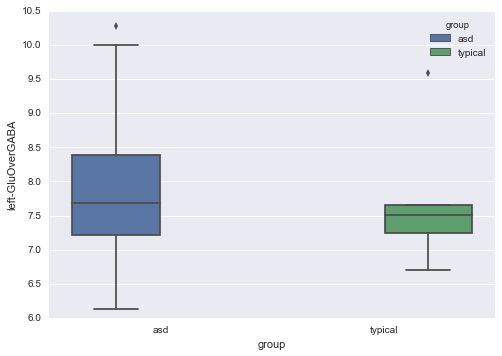

In [19]:
bp = sb.boxplot(data=lt_corr_metab,x='group', y=[x for x in corr_metab.columns if 'left' in x][-1], hue='group', )#, markers=['o', 'x'], kind='reg')

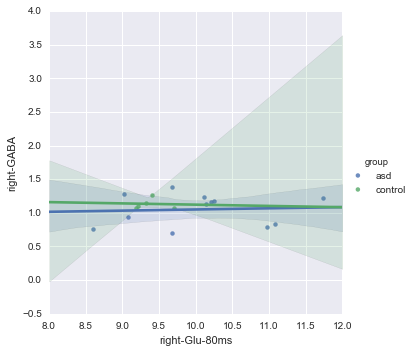

In [31]:
mlr = sb.lmplot(x='right-Glu-80ms', y='right-GABA', hue='group', data=rt_corr_metab)

TypeError: argument 2 to map() must support iteration

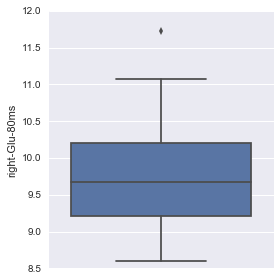

In [30]:
bp = sb.factorplot(data=rt_corr_metab, kind='box', hue='group', y='right-Glu-80ms')

In [4]:
hdf = corr_metab
asd_grp = hdf.index.str.replace('sub-nbwr', '').astype('int') < 400  # ASD only
tvalues, pvalues = ss.ttest_ind(hdf[asd_grp], hdf[~asd_grp], equal_var=False)
descriptives = hdf.groupby(group_by.astype(int)).describe()
descriptives.rename(index={0: 'control', 1: 'asd'}, inplace=True)
descriptives.index.rename('descriptives', inplace=True)
descriptives.T

descriptives              control        asd
left-GABA         count  5.000000  12.000000
                  mean   1.136889   1.094722
                  std    0.078906   0.161713
                  min    0.996667   0.798889
                  25%    1.162222   0.995278
                  50%    1.165556   1.140556
                  75%    1.174444   1.225000
                  max    1.185556   1.268889
left-NAAplusNAAG  count  5.000000  12.000000
                  mean   8.328444   8.085000
                  std    0.416664   0.621309
                  min    7.813333   7.155556
                  25%    8.037778   7.706389
                  50%    8.316667   7.878333
                  75%    8.665556   8.796111
                  max    8.808889   8.920000
left-GPCplusPCh   count  5.000000  12.000000
                  mean   1.597778   1.631204
                  std    0.179502   0.129330
                  min    1.381111   1.428889
                  25%    1.501111   1.540278
                  50%    1.575556   1.609444
                  75%    1.676667   1.723056
                  max    1.854444   1.865556
left-CrplusPCr    count  5.000000  12.000000
                  mean   6.222222   6.200093
                  std    0.142253   0.316652
                  min    5.990000   5.748889
                  25%    6.210000   6.021667
                  50%    6.243333   6.107222
...                           ...        ...
right-CrplusPCr   std    0.298802   0.320717
                  min    7.598750   7.377500
                  25%    7.968750   7.523750
                  50%    8.065000   7.599375
                  75%    8.086250   7.887187
                  max    8.433750   8.420000
right-mIns        count  5.000000  12.000000
                  mean   4.977750   4.792604
                  std    0.521605   0.539417
                  min    4.381250   4.001250
                  25%    4.636250   4.339687
                  50%    4.983750   4.858750
                  75%    5.142500   5.336875
                  max    5.745000   5.415000
right-Glu-80ms    count  5.000000  12.000000
                  mean   9.361750  10.044896
                  std    0.206270   0.914772
                  min    9.183750   8.597500
                  25%    9.211250   9.525000
                  50%    9.318750  10.127500
                  75%    9.397500  10.426875
                  max    9.697500  11.731250
right-GluOverGABA count  5.000000  12.000000
                  mean   8.294631  10.023215
                  std    0.598063   2.471116
                  min    7.414201   6.985560
                  25%    8.165389   8.625976
                  50%    8.317156   9.312204
                  75%    8.513326  11.766911
                  max    9.063084  13.806604

[112 rows x 2 columns]

In [ ]:
## wip scratch code for pd.apply and groupby

In [32]:
args = (corr_metab[corr_metab.index.str.replace('sub-nbwr','').astype('int') < 400], corr_metab[corr_metab[corr_metab.index.str.replace('sub-nbwr','').astype('int') >= 400]])
corr_metab.groupby((corr_metab.index.str.replace('sub-nbwr','').astype('int') < 400).apply(ss.ttest_ind, axis=0, args=args)

SyntaxError: invalid syntax (<ipython-input-32-d9389b8972dc>, line 2)

In [25]:
corr_metab[corr_metab.index.str.replace('sub-nbwr','').astype('int') < 400]

,left-GABA,left-NAAplusNAAG,left-GPCplusPCh,left-CrplusPCr,left-mIns,left-Glu-80ms,left-GluOverGABA,right-GABA,right-NAAplusNAAG,right-GPCplusPCh,right-CrplusPCr,right-mIns,right-Glu-80ms,right-GluOverGABA
subject,,,,,,,,,,,,,,
sub-nbwr007,1.213333,8.920000,1.722222,5.996667,3.077778,8.183333,6.744505,1.16875,9.02125,2.19500,7.51625,4.00250,10.24375,8.764706
sub-nbwr038,0.866667,7.868889,1.428889,6.235556,3.708889,8.220000,9.484615,0.93750,7.75750,1.82000,7.40125,4.57375,9.08250,9.688000
sub-nbwr088,1.260000,7.438889,1.592222,6.077778,2.657778,7.714444,6.122575,1.28250,7.96875,1.86375,7.56875,4.33125,9.02000,7.033138
sub-nbwr107,0.947778,7.887778,1.725556,6.495556,3.845556,9.473333,9.995311,1.38500,8.31250,2.08625,7.87000,5.39750,9.67500,6.985560
sub-nbwr110,1.030000,7.824444,1.537778,6.710000,4.122222,8.264444,8.023732,0.76625,8.75000,1.89500,8.16875,5.33875,8.59750,11.220228
sub-nbwr132,0.798889,8.232222,1.707778,5.824444,3.298889,8.214444,10.282337,0.82625,9.64750,2.31250,7.93875,4.34250,11.07750,13.406959
sub-nbwr135,1.268889,7.791111,1.614444,6.136667,3.595556,9.250000,7.289842,1.16500,9.36000,2.21875,8.42000,5.03500,10.20750,8.761803
sub-nbwr144,1.120000,8.787778,1.466667,6.030000,3.465556,8.380000,7.482143,0.70250,8.57625,1.68750,7.37750,5.33625,9.67250,13.768683
sub-nbwr226,1.195556,7.452222,1.541111,5.748889,4.001111,8.387778,7.015799,0.79500,8.65000,2.06750,7.63000,5.41500,10.97625,13.806604


In [28]:
corr_metab[corr_metab[corr_metab['group']]['group'].values].values

ValueError: Item wrong length 12 instead of 17.

In [23]:
args = (corr_metab[corr_metab.index.str.replace('sub-nbwr','').astype('int') < 400], corr_metab[corr_metab[corr_metab.index.str.replace('sub-nbwr','').astype('int') >= 400]])
corr_metab.apply(ss.ttest_ind, axis=0, args=args)

ValueError: Must pass DataFrame with boolean values only

In [ ]:
ttest_ind()